# Import

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from datetime import datetime, timedelta, date
from sklearn import preprocessing

In [4]:
import plotly.graph_objects as go

# pandas max row 
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Data Load

In [5]:
df = pd.read_csv('/home/lumi/abnormaly_detection/04_KAMP/01_data/melting_tank.csv', encoding='cp949')

In [6]:
df.head()

STD_DT  NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
0  2020-03-04 0:00    0        489         116          631  3.19  OK
1  2020-03-04 0:00    1        433          78          609  3.19  OK
2  2020-03-04 0:00    2        464         154          608  3.19  OK
3  2020-03-04 0:00    3        379         212          606  3.19  OK
4  2020-03-04 0:00    4        798        1736          604  3.21  OK

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STD_DT       835200 non-null  object 
 1   NUM          835200 non-null  int64  
 2   MELT_TEMP    835200 non-null  int64  
 3   MOTORSPEED   835200 non-null  int64  
 4   MELT_WEIGHT  835200 non-null  int64  
 5   INSP         835200 non-null  float64
 6   TAG          835200 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ MB


In [8]:
df.describe()

NUM      MELT_TEMP     MOTORSPEED    MELT_WEIGHT  \
count  835200.000000  835200.000000  835200.000000  835200.000000   
mean   417599.500000     509.200623     459.782865     582.962125   
std    241101.616751     128.277519     639.436413    1217.604433   
min         0.000000     308.000000       0.000000       0.000000   
25%    208799.750000     430.000000     119.000000     186.000000   
50%    417599.500000     469.000000     168.000000     383.000000   
75%    626399.250000     502.000000     218.000000     583.000000   
max    835199.000000     832.000000    1804.000000   55252.000000   

                INSP  
count  835200.000000  
mean        3.194853  
std         0.011822  
min         3.170000  
25%         3.190000  
50%         3.190000  
75%         3.200000  
max         3.230000

In [9]:
df.isnull().sum()

STD_DT         0
NUM            0
MELT_TEMP      0
MOTORSPEED     0
MELT_WEIGHT    0
INSP           0
TAG            0
dtype: int64

# Data Preprocessing

In [10]:
df['STD_DT'] = df['STD_DT'].apply(lambda x : pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S'))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STD_DT       835200 non-null  datetime64[ns]
 1   NUM          835200 non-null  int64         
 2   MELT_TEMP    835200 non-null  int64         
 3   MOTORSPEED   835200 non-null  int64         
 4   MELT_WEIGHT  835200 non-null  int64         
 5   INSP         835200 non-null  float64       
 6   TAG          835200 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 44.6+ MB


In [12]:
df.head(20)

STD_DT  NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
0  2020-03-04 00:00:00    0        489         116          631  3.19  OK
1  2020-03-04 00:00:00    1        433          78          609  3.19  OK
2  2020-03-04 00:00:00    2        464         154          608  3.19  OK
3  2020-03-04 00:00:00    3        379         212          606  3.19  OK
4  2020-03-04 00:00:00    4        798        1736          604  3.21  OK
5  2020-03-04 00:00:00    5        743        1722          603  3.21  OK
6  2020-03-04 00:00:00    6        390         212          602  3.19  OK
7  2020-03-04 00:00:00    7        493         152          600  3.19  OK
8  2020-03-04 00:00:00    8        427           0          599  3.19  OK
9  2020-03-04 00:00:00    9        489         148          598  3.20  OK
10 2020-03-04 00:01:00   10        507         128          596  3.19  OK
11 2020-03-04 00:01:00   11        408          66          595  3.19  OK
12 2020-03-04 00:01:00   12        474         138          594  3.19  OK
13 2020-03-04 00:01:00   13        358         201          592  3.19  OK
14 2020-03-04 00:01:00   14        740        1740          590  3.22  OK
15 2020-03-04 00:01:00   15        772        1729          588  3.22  OK
16 2020-03-04 00:01:00   16        424         195          586  3.18  OK
17 2020-03-04 00:01:00   17        460         158          585  3.19  OK
18 2020-03-04 00:01:00   18        440           0          584  3.19  OK
19 2020-03-04 00:01:00   19        504         133          582  3.19  OK

In [13]:
def add_sec(df):
    times = df.name%10
    df['STD_DT'] = df['STD_DT'] + timedelta(seconds=6*times)
    return df

In [14]:
df = df.apply(add_sec, axis=1) # 오래걸림!!  저장해논 df.csv사용 추천

In [15]:
NG_date = df[df['TAG'] == 'NG']['STD_DT'].apply(lambda x : x.date()).unique() 

In [16]:
NG_date

array([datetime.date(2020, 3, 17), datetime.date(2020, 3, 18),
       datetime.date(2020, 3, 19), datetime.date(2020, 3, 20),
       datetime.date(2020, 3, 21), datetime.date(2020, 3, 22),
       datetime.date(2020, 3, 23), datetime.date(2020, 3, 24),
       datetime.date(2020, 3, 25), datetime.date(2020, 3, 26),
       datetime.date(2020, 3, 27), datetime.date(2020, 3, 28),
       datetime.date(2020, 3, 29), datetime.date(2020, 3, 30),
       datetime.date(2020, 3, 31), datetime.date(2020, 4, 1),
       datetime.date(2020, 4, 2), datetime.date(2020, 4, 3),
       datetime.date(2020, 4, 4), datetime.date(2020, 4, 5),
       datetime.date(2020, 4, 6), datetime.date(2020, 4, 7),
       datetime.date(2020, 4, 8), datetime.date(2020, 4, 9),
       datetime.date(2020, 4, 10), datetime.date(2020, 4, 11),
       datetime.date(2020, 4, 12), datetime.date(2020, 4, 13),
       datetime.date(2020, 4, 14)], dtype=object)

In [17]:
len(NG_date) # 약 2개월동안 29일이 고장

29

In [18]:
df = df.set_index(['STD_DT'])

In [19]:
df.head(20)

NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
STD_DT                                                                
2020-03-04 00:00:00    0        489         116          631  3.19  OK
2020-03-04 00:00:06    1        433          78          609  3.19  OK
2020-03-04 00:00:12    2        464         154          608  3.19  OK
2020-03-04 00:00:18    3        379         212          606  3.19  OK
2020-03-04 00:00:24    4        798        1736          604  3.21  OK
2020-03-04 00:00:30    5        743        1722          603  3.21  OK
2020-03-04 00:00:36    6        390         212          602  3.19  OK
2020-03-04 00:00:42    7        493         152          600  3.19  OK
2020-03-04 00:00:48    8        427           0          599  3.19  OK
2020-03-04 00:00:54    9        489         148          598  3.20  OK
2020-03-04 00:01:00   10        507         128          596  3.19  OK
2020-03-04 00:01:06   11        408          66          595  3.19  OK
2020-03-04 00:01:12   12        474         138          594  3.19  OK
2020-03-04 00:01:18   13        358         201          592  3.19  OK
2020-03-04 00:01:24   14        740        1740          590  3.22  OK
2020-03-04 00:01:30   15        772        1729          588  3.22  OK
2020-03-04 00:01:36   16        424         195          586  3.18  OK
2020-03-04 00:01:42   17        460         158          585  3.19  OK
2020-03-04 00:01:48   18        440           0          584  3.19  OK
2020-03-04 00:01:54   19        504         133          582  3.19  OK

In [20]:
df.columns

Index(['NUM', 'MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG'], dtype='object')

In [21]:
col_name = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']

# EDA

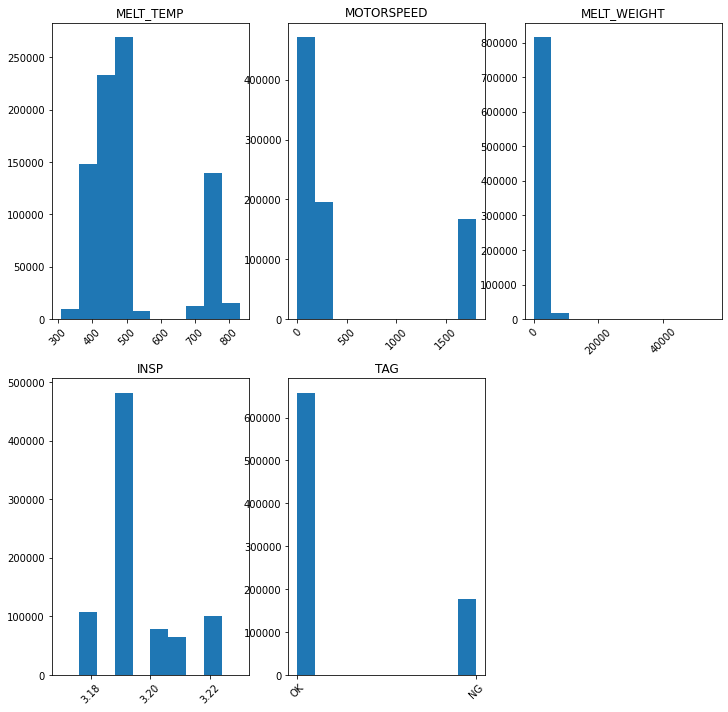

In [22]:
plt.figure(figsize=(12,12))
for i in range(len(col_name)):
    num = 231+i
    plt.subplot(num)
    plt.hist(df[col_name[i]])
    plt.xticks(rotation=45)
    plt.title(col_name[i])
plt.show()

In [23]:
df.head(3)

NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
STD_DT                                                                
2020-03-04 00:00:00    0        489         116          631  3.19  OK
2020-03-04 00:00:06    1        433          78          609  3.19  OK
2020-03-04 00:00:12    2        464         154          608  3.19  OK

In [24]:
df.columns

Index(['NUM', 'MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG'], dtype='object')

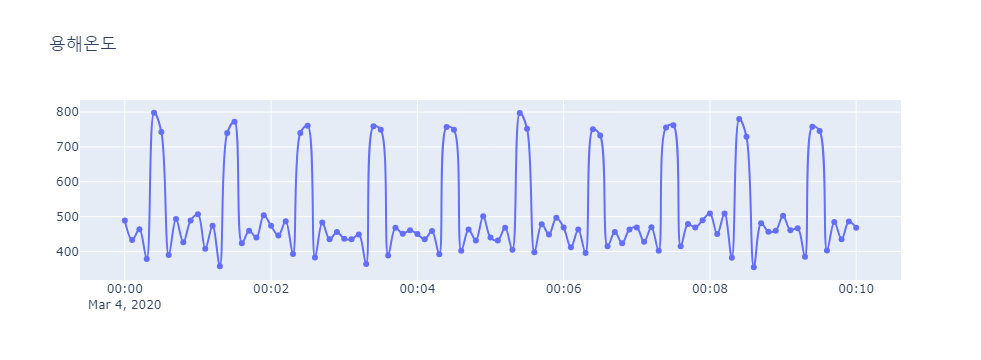

In [26]:
f = go.FigureWidget()
f.layout.title = '용해온도'
f.add_scatter(y=df['MELT_TEMP'][:'2020-03-04 00:10:00'], x = df[:'2020-03-04 00:10:00'].index, name = 'MELT_TEMP', mode='lines+markers', line_shape='spline'); 
f.show()

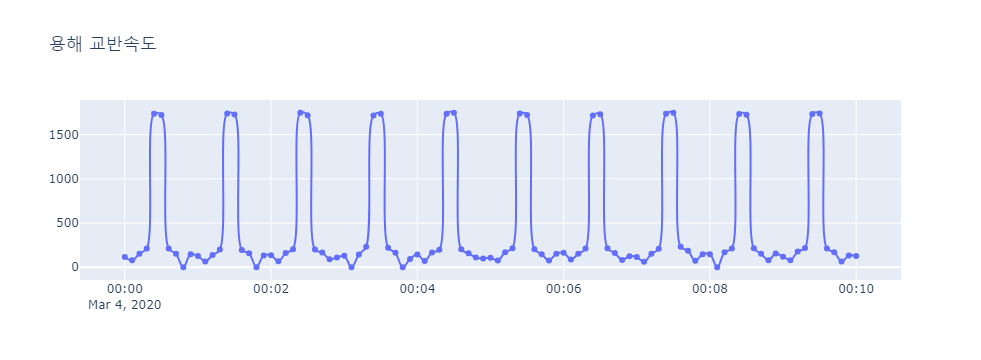

In [27]:
f = go.FigureWidget()
f.layout.title = '용해 교반속도'
f.add_scatter(y=df['MOTORSPEED'][:'2020-03-04 00:10:00'], x = df[:'2020-03-04 00:10:00'].index, name = 'MOTORSPEED', mode='lines+markers', line_shape='spline'); 
f.show()

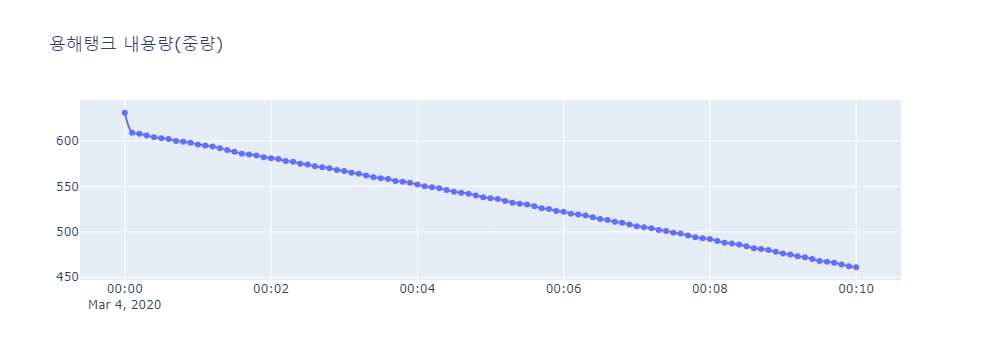

In [28]:
f = go.FigureWidget()
f.layout.title = '용해탱크 내용량(중량)'
f.add_scatter(y=df['MELT_WEIGHT'][:'2020-03-04 00:10:00'], x = df[:'2020-03-04 00:10:00'].index, name = 'MOTORSPEED', mode='lines+markers', line_shape='spline'); 
f.show()

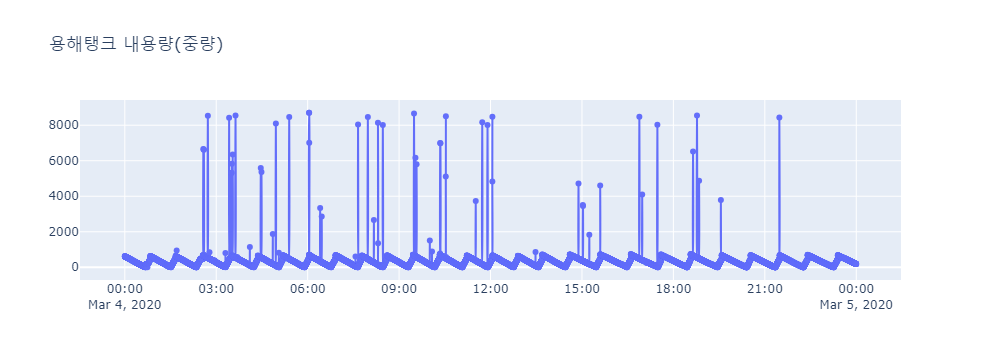

In [29]:
f = go.FigureWidget()
f.layout.title = '용해탱크 내용량(중량)'
f.add_scatter(y=df['MELT_WEIGHT'][:'2020-03-04'], x = df[:'2020-03-04'].index, name = 'MOTORSPEED', mode='lines+markers', line_shape='spline'); 
f.show()

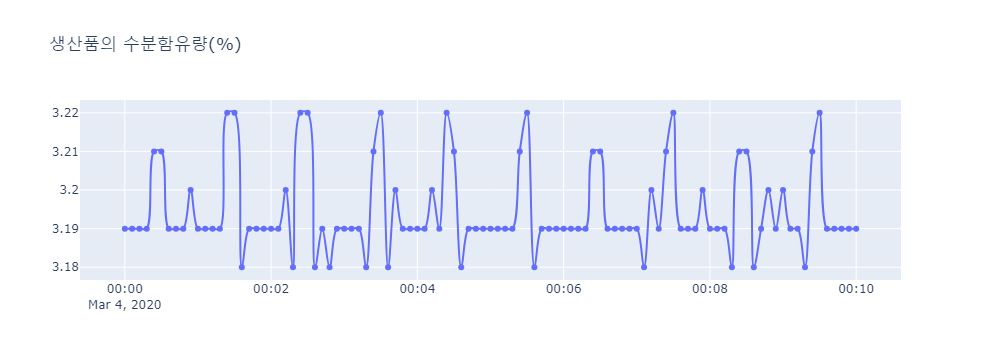

In [30]:
f = go.FigureWidget()
f.layout.title = '생산품의 수분함유량(%)'
f.add_scatter(y=df['INSP'][:'2020-03-04 00:10:00'], x = df[:'2020-03-04 00:10:00'].index, name = 'INSP', mode='lines+markers', line_shape='spline'); 
f.show()

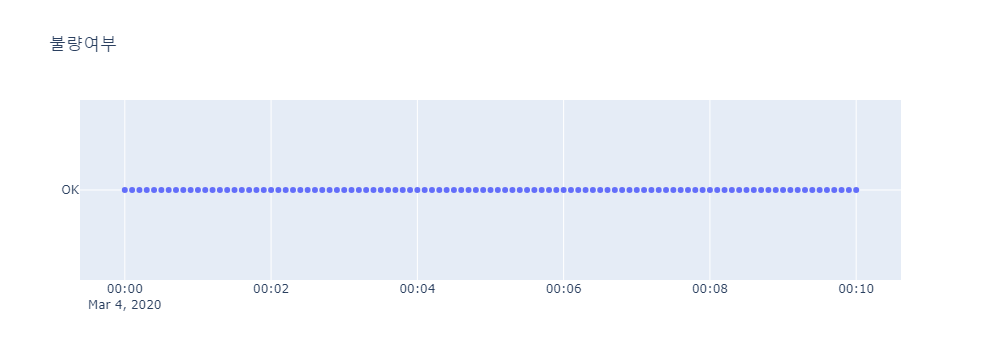

In [31]:
f = go.FigureWidget()
f.layout.title = '불량여부'
f.add_scatter(y=df['TAG'][:'2020-03-04 00:10:00'], x = df[:'2020-03-04 00:10:00'].index, name = 'TAG', mode='markers', line_shape='spline'); 
f.show()

## 불량 날짜 확인

In [32]:
NG_date

array([datetime.date(2020, 3, 17), datetime.date(2020, 3, 18),
       datetime.date(2020, 3, 19), datetime.date(2020, 3, 20),
       datetime.date(2020, 3, 21), datetime.date(2020, 3, 22),
       datetime.date(2020, 3, 23), datetime.date(2020, 3, 24),
       datetime.date(2020, 3, 25), datetime.date(2020, 3, 26),
       datetime.date(2020, 3, 27), datetime.date(2020, 3, 28),
       datetime.date(2020, 3, 29), datetime.date(2020, 3, 30),
       datetime.date(2020, 3, 31), datetime.date(2020, 4, 1),
       datetime.date(2020, 4, 2), datetime.date(2020, 4, 3),
       datetime.date(2020, 4, 4), datetime.date(2020, 4, 5),
       datetime.date(2020, 4, 6), datetime.date(2020, 4, 7),
       datetime.date(2020, 4, 8), datetime.date(2020, 4, 9),
       datetime.date(2020, 4, 10), datetime.date(2020, 4, 11),
       datetime.date(2020, 4, 12), datetime.date(2020, 4, 13),
       datetime.date(2020, 4, 14)], dtype=object)

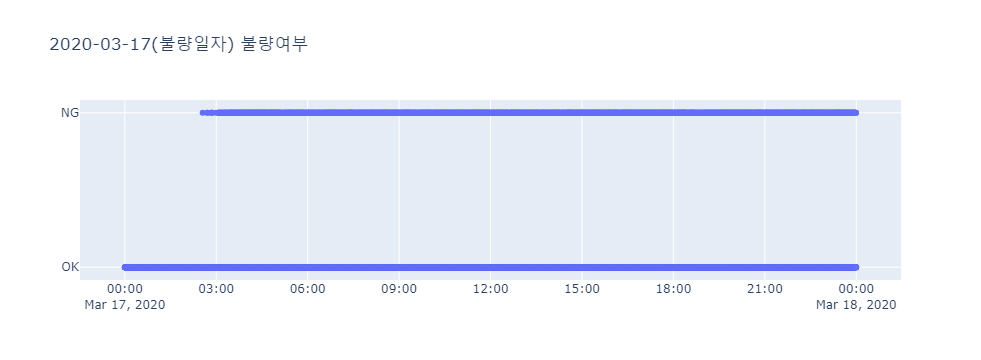

In [33]:
f = go.FigureWidget()
f.layout.title = '2020-03-17(불량일자) 불량여부'
f.add_scatter(y=df['TAG']['2020-03-17'], x =df['TAG']['2020-03-17'].index, name = 'TAG', mode='markers', line_shape='spline'); 
f.show()

In [34]:
dt_st = '2020-03-17 02:50:00'
dt_en = '2020-03-17 02:55:00'

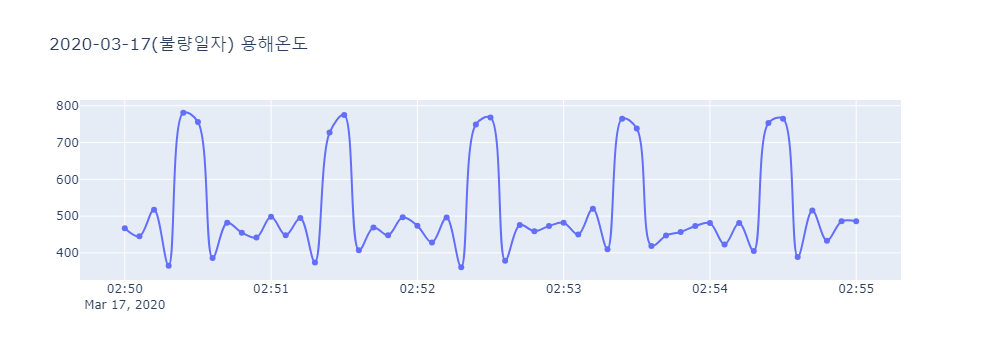

In [35]:
f = go.FigureWidget()
f.layout.title = '2020-03-17(불량일자) 용해온도'
f.add_scatter(y=df['MELT_TEMP'][dt_st:dt_en], x =df['MELT_TEMP'][dt_st:dt_en].index, name = 'MELT_TEMP', mode='lines+markers', line_shape='spline'); 
f.show()

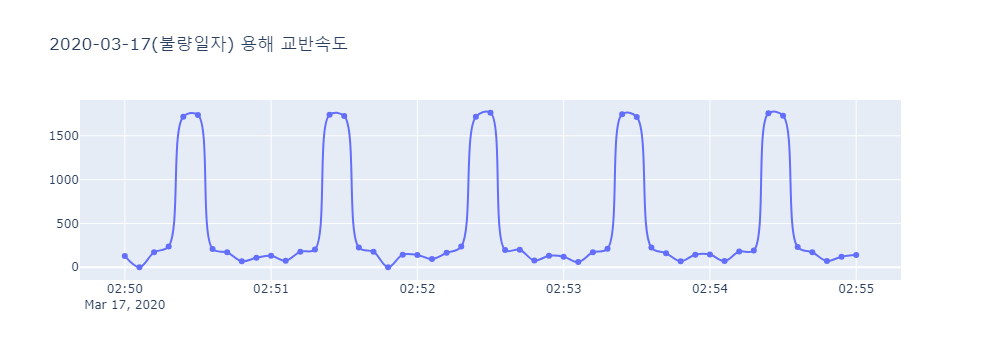

In [36]:
f = go.FigureWidget()
f.layout.title = '2020-03-17(불량일자) 용해 교반속도'
f.add_scatter(y=df['MOTORSPEED'][dt_st:dt_en], x =df['MOTORSPEED'][dt_st:dt_en].index, name = 'MOTORSPEED', mode='lines+markers', line_shape='spline'); 
f.show()

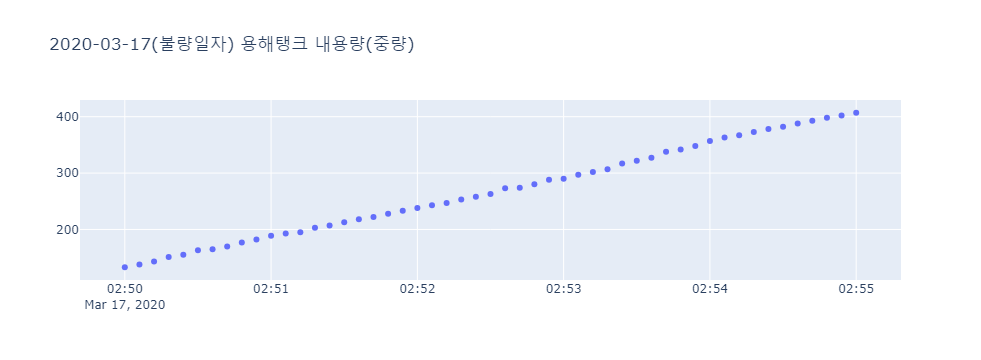

In [37]:
f = go.FigureWidget()
f.layout.title = '2020-03-17(불량일자) 용해탱크 내용량(중량)'
f.add_scatter(y=df['MELT_WEIGHT'][dt_st:dt_en], x =df['MELT_WEIGHT'][dt_st:dt_en].index, name = 'MELT_WEIGHT', mode='markers', line_shape='spline'); 
f.show()

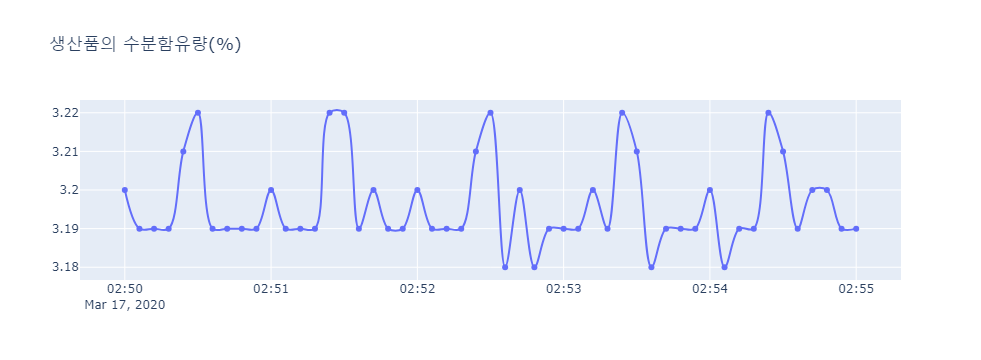

In [38]:
f = go.FigureWidget()
f.layout.title = '생산품의 수분함유량(%)'
f.add_scatter(y=df['INSP'][dt_st:dt_en], x = df[dt_st:dt_en].index, name = 'INSP', mode='lines+markers', line_shape='spline'); 
f.show()

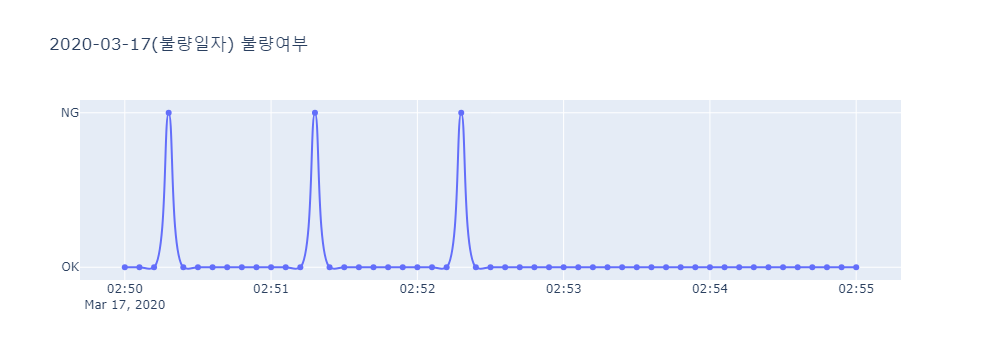

In [39]:
f = go.FigureWidget()
f.layout.title = '2020-03-17(불량일자) 불량여부'
f.add_scatter(y=df['TAG'][dt_st:dt_en], x =df['TAG'][dt_st:dt_en].index, name = 'TAG', mode='lines+markers', line_shape='spline'); 
f.show()

## 정상일자랑 비교하기

In [40]:
dt_st_nor = '2020-03-15 02:50:00'
dt_en_nor = '2020-03-15 02:55:00'

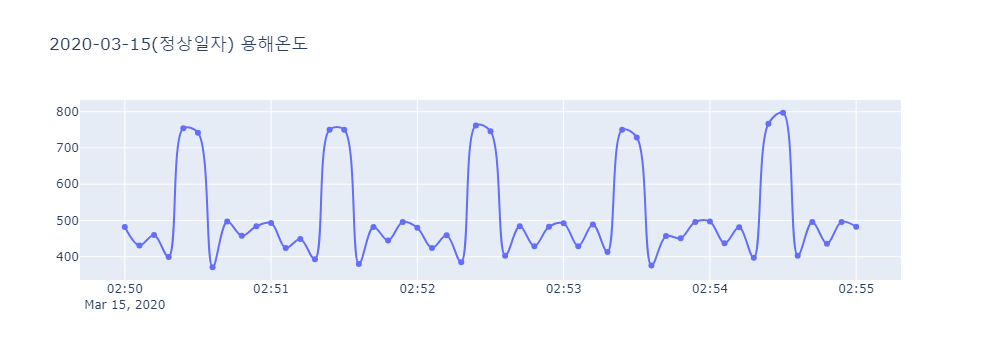

In [41]:
f = go.FigureWidget()
f.layout.title = '2020-03-15(정상일자) 용해온도'
f.add_scatter(y=df['MELT_TEMP'][dt_st_nor:dt_en_nor], x =df['MELT_TEMP'][dt_st_nor:dt_en_nor].index, name = 'MELT_TEMP', mode='lines+markers', line_shape='spline'); 
f.show()

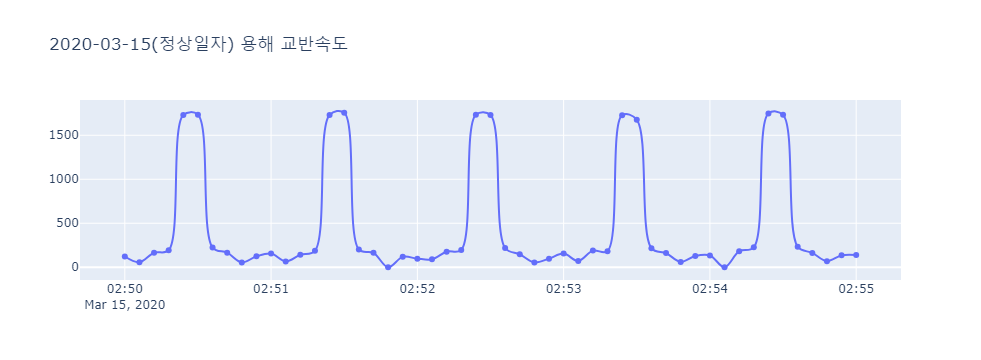

In [42]:
f = go.FigureWidget()
f.layout.title = '2020-03-15(정상일자) 용해 교반속도'
f.add_scatter(y=df['MOTORSPEED'][dt_st_nor:dt_en_nor], x =df['MOTORSPEED'][dt_st_nor:dt_en_nor].index, name = 'MOTORSPEED', mode='lines+markers', line_shape='spline'); 
f.show()

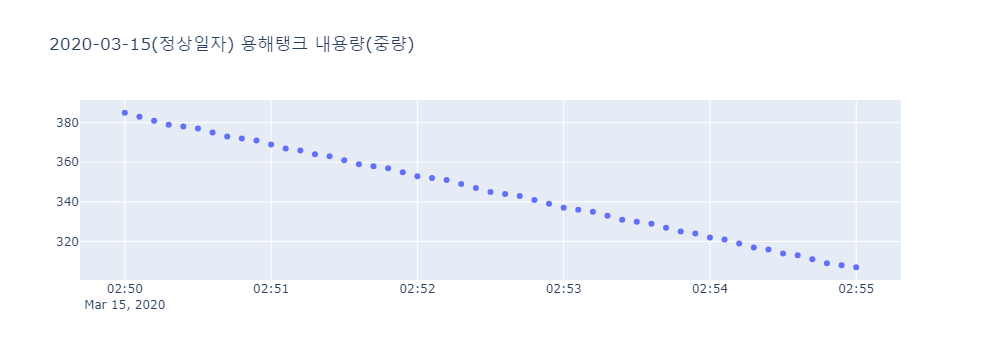

In [43]:
f = go.FigureWidget()
f.layout.title = '2020-03-15(정상일자) 용해탱크 내용량(중량)'
f.add_scatter(y=df['MELT_WEIGHT'][dt_st_nor:dt_en_nor], x =df['MELT_WEIGHT'][dt_st_nor:dt_en_nor].index, name = 'MELT_WEIGHT', mode='markers', line_shape='spline'); 
f.show()

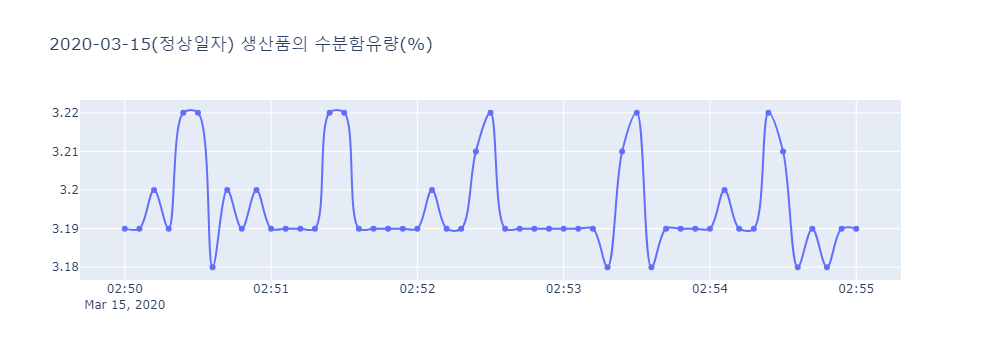

In [44]:
f = go.FigureWidget()
f.layout.title = '2020-03-15(정상일자) 생산품의 수분함유량(%)'
f.add_scatter(y=df['INSP'][dt_st_nor:dt_en_nor], x = df[dt_st_nor:dt_en_nor].index, name = 'INSP', mode='lines+markers', line_shape='spline'); 
f.show()

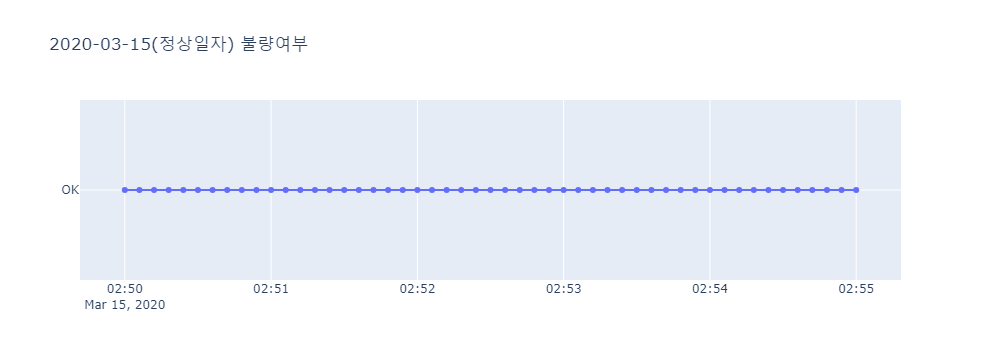

In [45]:
f = go.FigureWidget()
f.layout.title = '2020-03-15(정상일자) 불량여부'
f.add_scatter(y=df['TAG'][dt_st_nor:dt_en_nor], x =df['TAG'][dt_st_nor:dt_en_nor].index, name = 'TAG', mode='lines+markers', line_shape='spline'); 
f.show()

In [46]:
df.TAG.unique()

array(['OK', 'NG'], dtype=object)

In [47]:
df.TAG = df.TAG.replace('OK',0).replace('NG',1)

In [48]:
df.head(3)

NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP  TAG
STD_DT                                                                 
2020-03-04 00:00:00    0        489         116          631  3.19    0
2020-03-04 00:00:06    1        433          78          609  3.19    0
2020-03-04 00:00:12    2        464         154          608  3.19    0

In [49]:
df.to_csv('df.csv') # 6초 더한거 미리 저장

In [50]:
df_w = df.copy() # 중량 이상치 처럼 보이는 거 제거

In [51]:
idx_del = df_w[df_w.MELT_WEIGHT > 800]['MELT_WEIGHT'].index # 대략적으로 봤을 때 800이상 값 제거

In [52]:
df_w.loc[idx_del, 'MELT_WEIGHT'] = np.nan

In [53]:
df_w['MELT_WEIGHT'].isnull().sum()

60697

In [54]:
df_w['MELT_WEIGHT'] = df_w['MELT_WEIGHT'].interpolate()

In [55]:
f_abn = go.FigureWidget()
f_abn.layout.title = '2020-03-17(불량일자)'
f_abn.add_scatter(y=df_w['MELT_TEMP']['2020-03-17'], x =df_w['MELT_TEMP']['2020-03-17'].index, name = 'MELT_TEMP', mode='lines+markers', line_shape='spline'); 
f_abn.add_scatter(y=df_w['MOTORSPEED']['2020-03-17'], x =df_w['MOTORSPEED']['2020-03-17'].index, name = 'MOTORSPEED', mode='lines+markers', line_shape='spline'); 
f_abn.add_scatter(y=df_w['MELT_WEIGHT']['2020-03-17'], x =df_w['MELT_WEIGHT']['2020-03-17'].index, name = 'MELT_WEIGHT', mode='markers', line_shape='spline'); 
f_abn.add_scatter(y=df_w['INSP']['2020-03-17'], x = df_w['2020-03-17'].index, name = 'INSP', mode='lines+markers', line_shape='spline'); 
f_abn.add_scatter(y=df_w['TAG']['2020-03-17'], x =df_w['TAG']['2020-03-17'].index, name = 'TAG', mode='lines+markers', line_shape='spline'); 
# f_abn.show()
f_abn.write_html('f_abn_200317.html')

<ipython-input-55-c4cfdb5a484d>:6: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



In [56]:
f_nor = go.FigureWidget()
f_nor.layout.title = '2020-03-15(정상일자)'
f_nor.add_scatter(y=df_w['MELT_TEMP']['2020-03-15'], x =df_w['MELT_TEMP']['2020-03-15'].index, name = 'MELT_TEMP', mode='lines+markers', line_shape='spline'); 
f_nor.add_scatter(y=df_w['MOTORSPEED']['2020-03-15'], x =df_w['MOTORSPEED']['2020-03-15'].index, name = 'MOTORSPEED', mode='lines+markers', line_shape='spline'); 
f_nor.add_scatter(y=df_w['MELT_WEIGHT']['2020-03-15'], x =df_w['MELT_WEIGHT']['2020-03-15'].index, name = 'MELT_WEIGHT', mode='markers', line_shape='spline'); 
f_nor.add_scatter(y=df_w['INSP']['2020-03-15'], x = df_w['2020-03-15'].index, name = 'INSP', mode='lines+markers', line_shape='spline'); 
f_nor.add_scatter(y=df_w['TAG']['2020-03-15'], x =df_w['TAG']['2020-03-15'].index, name = 'TAG', mode='lines+markers', line_shape='spline'); 
# f_nor.show()
f_nor.write_html('f_nor_200315.html')

<ipython-input-56-3c529b72d66c>:6: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



## 정규화해서 비교

In [57]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

In [58]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_w)

In [59]:
df.columns

Index(['NUM', 'MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG'], dtype='object')

In [60]:
df_scaled = pd.DataFrame(data=df_scaled, columns= df.columns, index = df.index)

In [61]:
f_abn = go.FigureWidget()
f_abn.layout.title = '2020-03-17(불량일자)'
f_abn.add_scatter(y=df_scaled['MELT_TEMP']['2020-03-17'], x =df_scaled['MELT_TEMP']['2020-03-17'].index, name = 'MELT_TEMP', mode='lines+markers', line_shape='spline'); 
f_abn.add_scatter(y=df_scaled['MOTORSPEED']['2020-03-17'], x =df_scaled['MOTORSPEED']['2020-03-17'].index, name = 'MOTORSPEED', mode='lines+markers', line_shape='spline'); 
f_abn.add_scatter(y=df_scaled['MELT_WEIGHT']['2020-03-17'], x =df_scaled['MELT_WEIGHT']['2020-03-17'].index, name = 'MELT_WEIGHT', mode='markers', line_shape='spline'); 
f_abn.add_scatter(y=df_scaled['INSP']['2020-03-17'], x = df_scaled['2020-03-17'].index, name = 'INSP', mode='lines+markers', line_shape='spline'); 
f_abn.add_scatter(y=df_scaled['TAG']['2020-03-17'], x =df_scaled['TAG']['2020-03-17'].index, name = 'TAG', mode='lines+markers', line_shape='spline'); 
# f_abn.show()
f_abn.write_html(f'f_abn_scaled_200317.html')

<ipython-input-61-8e3f16742426>:6: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



In [62]:
f_nor = go.FigureWidget()
f_nor.layout.title = '2020-03-15(정상일자)'
f_nor.add_scatter(y=df_scaled['MELT_TEMP']['2020-03-15'], x =df_scaled['MELT_TEMP']['2020-03-15'].index, name = 'MELT_TEMP', mode='lines+markers', line_shape='spline'); 
f_nor.add_scatter(y=df_scaled['MOTORSPEED']['2020-03-15'], x =df_scaled['MOTORSPEED']['2020-03-15'].index, name = 'MOTORSPEED', mode='lines+markers', line_shape='spline'); 
f_nor.add_scatter(y=df_scaled['MELT_WEIGHT']['2020-03-15'], x =df_scaled['MELT_WEIGHT']['2020-03-15'].index, name = 'MELT_WEIGHT', mode='markers', line_shape='spline'); 
f_nor.add_scatter(y=df_scaled['INSP']['2020-03-15'], x = df_scaled['2020-03-15'].index, name = 'INSP', mode='lines+markers', line_shape='spline'); 
f_nor.add_scatter(y=df_scaled['TAG']['2020-03-15'], x =df_scaled['TAG']['2020-03-15'].index, name = 'TAG', mode='lines+markers', line_shape='spline'); 
# f_nor.show()
f_nor.write_html(f'f_nor_scaled_200315.html')

<ipython-input-62-48b97bcedfa4>:6: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

